# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'd:\imageclassification\imageclasskernel\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-d9er14eb\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-d9er14eb\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\irems\AppData\Local\Temp\pip-wheel-ffpa_22q'
       cwd: C:\Users\irems\AppData\Local\Temp\pip-install-d9er14eb\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\irems\AppData\Local\Temp\pip-install-d9er14eb\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" pack

In [2]:
pip install tensorflow  opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
cycler                       0.11.0
debugpy                      1.7.0
decorator                    5.1.1
entrypoints                  0.4
flatbuffers                  23.5.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.25.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.8.0
idna                         3.6
importlib-metadata           6.7.0
ipykernel                    6.16.2
ipython                      7.34.0
jedi                         0.19.1
joblib                       1.3.2


You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [49]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in d:\imageclassification\imageclasskernel\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in d:\imageclassification\imageclasskernel\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in d:\imageclassification\imageclasskernel\lib\site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [50]:
!pip install seaborn

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 12660 files belonging to 12 classes.


In [4]:
import numpy as np 

Found 12660 files belonging to 12 classes.


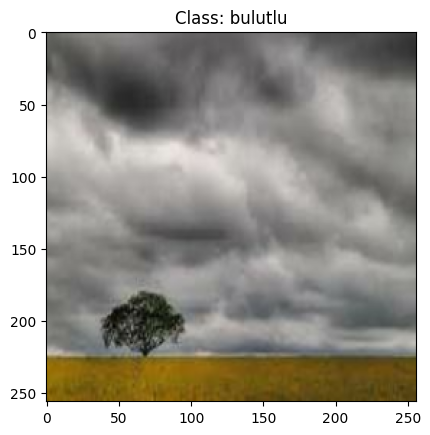

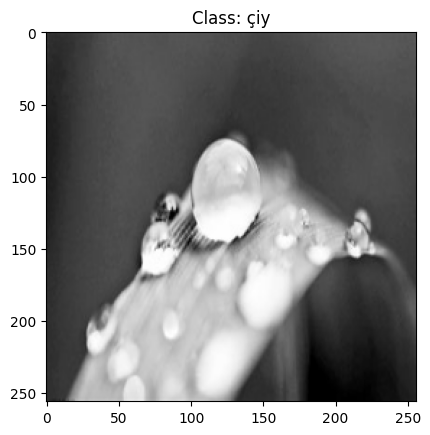

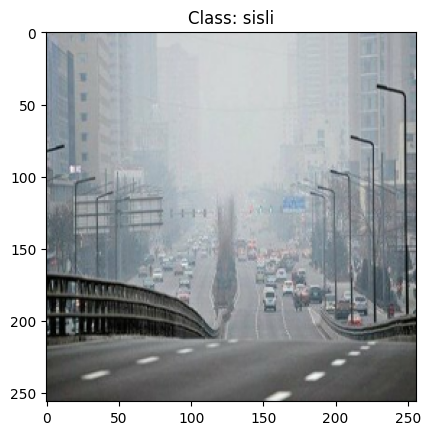

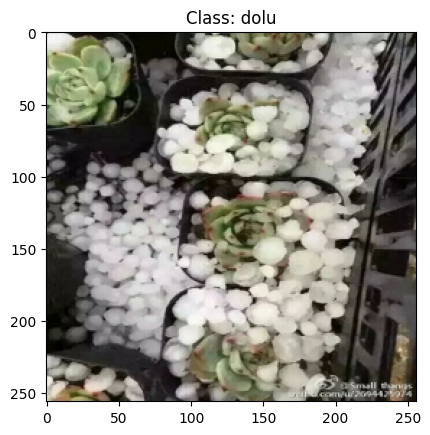

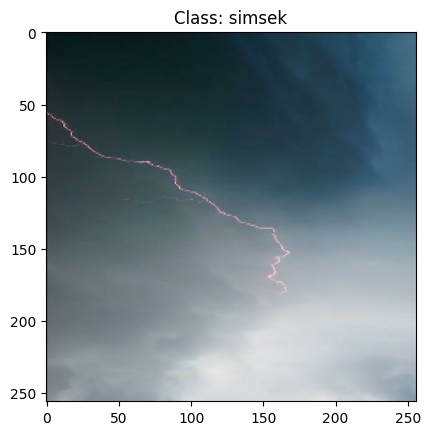

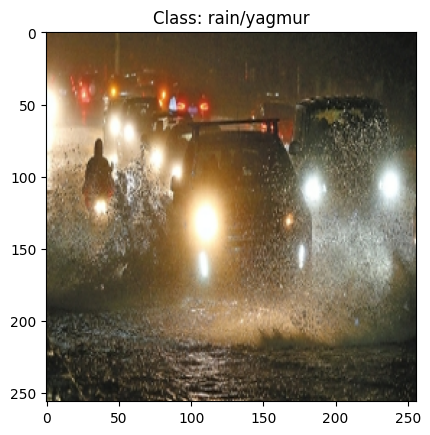

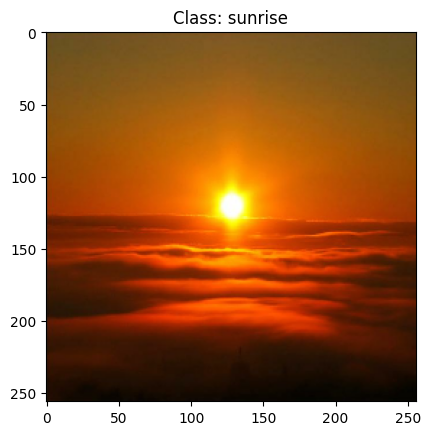

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt

data_dir = 'data'
class_labels = ['bulutlu', 'çiy', 'sisli', 'don', 'dolu', 'simsek', 'rain/yagmur', 'rainbow', 'kiragi','shine/gunes', 'kar', 'sunrise']

# Veri kümesini oluştur
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Veri kümesinin bir örnek batch'ini alma
batch = next(iter(data))

# Batch içindeki görüntüler ve etiketler
images, labels = batch

# Her bir sınıf için ilk görüntüyü gösterme
for class_index, class_label in enumerate(class_labels):
    class_indices = tf.where(labels == class_index).numpy().flatten()
    if len(class_indices) > 0:
        image_for_class = images[class_indices[0]]
        plt.imshow(image_for_class.numpy().astype(int))
        plt.title(f'Class: {class_label}')
        plt.show()


In [41]:
data_iterator = data.as_numpy_iterator()

In [42]:
batch = data_iterator.next()

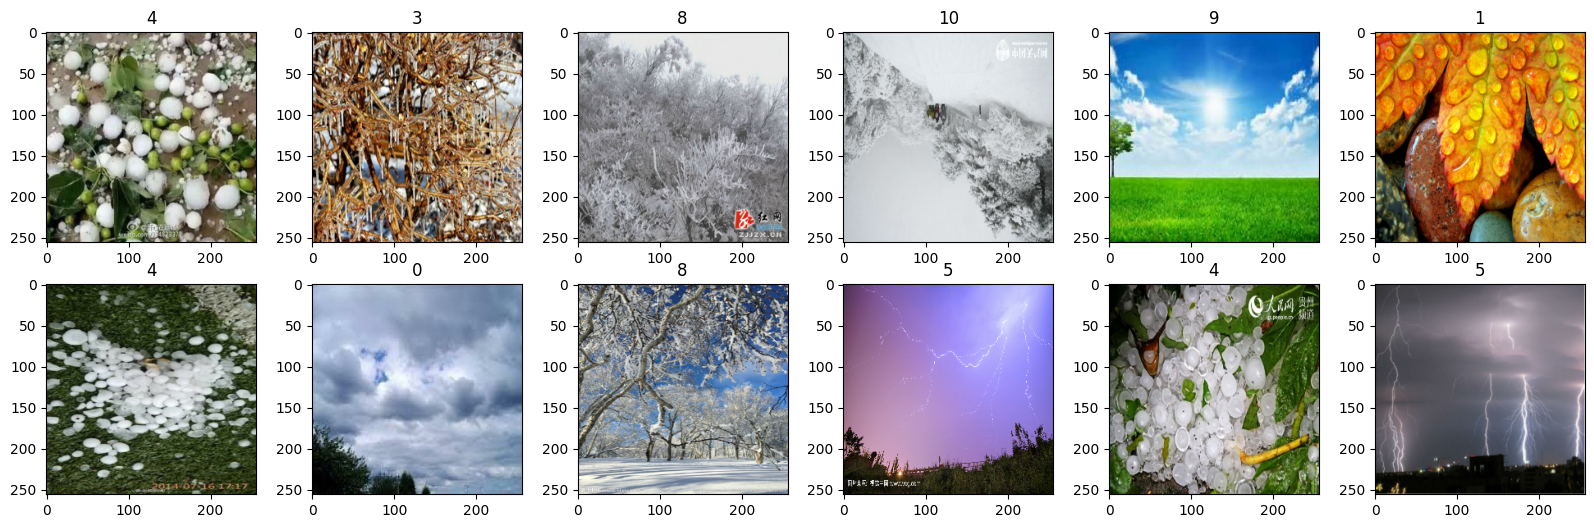

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

# Veri kümesinden 12 resmi gösterme
for i in range(2):
    for j in range(6):
        img_index = i * 6 + j
        if img_index < 12:
            ax[i, j].imshow(batch[0][img_index].astype(int))
            ax[i, j].title.set_text(batch[1][img_index])

plt.show()


# 4. Scale Data

In [44]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [10]:
# Veri setini normalize etme ve one-hot encoding uygulama
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=12)))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [11]:
data.as_numpy_iterator().next() 

(array([[[[1.36284083e-01, 2.56004900e-01, 6.02424182e-02],
          [1.39677167e-01, 2.56797642e-01, 6.65115640e-02],
          [1.41237751e-01, 2.60723025e-01, 6.55637234e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.26870781e-01, 2.52360970e-01, 5.64663745e-02],
          [1.31127447e-01, 2.55049407e-01, 6.32716790e-02],
          [1.35110289e-01, 2.52062261e-01, 6.19695932e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.39433980e-01, 2.60158151e-01, 6.43727034e-02],
          [1.36397064e-01, 2.54229844e-01, 6.46254569e-02],
          [1.34731159e-01, 2.50122547e-01, 6.04224093e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

# 5. Split Data

In [45]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

277

In [19]:
val_size

79

In [20]:
test_size

39

In [46]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
from collections import Counter
class_labels = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Train setindeki sınıfların örnek sayıları
train_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in train])

# Test setindeki sınıfların örnek sayıları
test_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in test])

print("Train seti sınıf örnek sayıları:")
print(train_class_counts)

print("\nTest seti sınıf örnek sayıları:")
print(test_class_counts)


Train seti sınıf örnek sayıları:
Counter({'sunrise': 39, 'rain': 29, 'hail': 28, 'lightining': 26, 'rime': 25, 'cloudy': 23, 'fogsmog': 23, 'snow': 19, 'glaze': 18, 'rainbow': 17, 'dew': 15, 'shine': 15})

Test seti sınıf örnek sayıları:
Counter({'dew': 7, 'sunrise': 5, 'snow': 5, 'rain': 5, 'hail': 4, 'fogsmog': 4, 'rainbow': 3, 'shine': 3, 'rime': 2, 'glaze': 1})


# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [48]:
num_classes = 12 # Toplam sınıf sayısı


In [49]:
model = Sequential()

model.add(BatchNormalization(input_shape=(256, 256, 3)))

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [50]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)      

# 7. Train

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
hist = model.fit(train, epochs=50, validation_data=val,  callbacks=[tensorboard_callback, early_stopping])

Epoch 1/50
277/277 [==============================] - 364s 1s/step - loss: 2.3568 - accuracy: 0.3160 - val_loss: 1.8119 - val_accuracy: 0.4739
Epoch 2/50
277/277 [==============================] - 503s 2s/step - loss: 1.6195 - accuracy: 0.4514 - val_loss: 1.5217 - val_accuracy: 0.5498
Epoch 3/50
277/277 [==============================] - 507s 2s/step - loss: 1.4074 - accuracy: 0.5211 - val_loss: 1.1595 - val_accuracy: 0.6555
Epoch 4/50
277/277 [==============================] - 503s 2s/step - loss: 1.2069 - accuracy: 0.5808 - val_loss: 1.1068 - val_accuracy: 0.7013
Epoch 5/50
277/277 [==============================] - 507s 2s/step - loss: 1.0729 - accuracy: 0.6152 - val_loss: 0.9840 - val_accuracy: 0.7025
Epoch 6/50
277/277 [==============================] - 501s 2s/step - loss: 0.9536 - accuracy: 0.6511 - val_loss: 0.8398 - val_accuracy: 0.7417
Epoch 7/50
277/277 [==============================] - 502s 2s/step - loss: 0.8483 - accuracy: 0.6880 - val_loss: 0.8739 - val_accuracy: 0.7243

# 8. Plot Performance

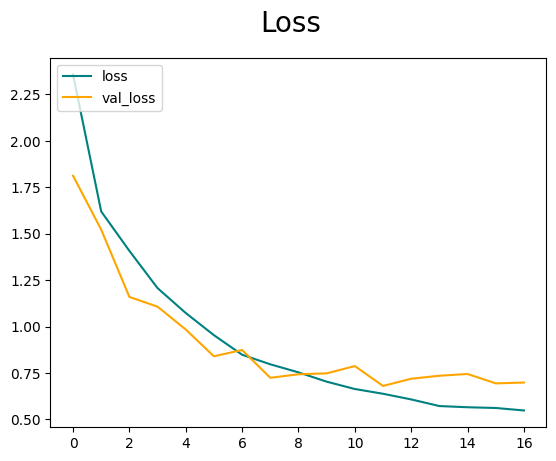

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [55]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

In [56]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [57]:
test = data.skip(train_size + val_size).take(test_size)

In [58]:
model.load_weights('D:\ImageClassification\models\model80basari.h5')

In [59]:
accuracy_metric = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    accuracy_metric.update_state(tf.argmax(y, axis=1), tf.argmax(yhat, axis=1))


test_accuracy = accuracy_metric.result().numpy()
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 2s 2s/step


InvalidArgumentError: {{function_node __wrapped__ArgMax_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expected dimension in the range [-1, 1), but got 1 [Op:ArgMax]

In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.88621795, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2
import matplotlib.pyplot as plt

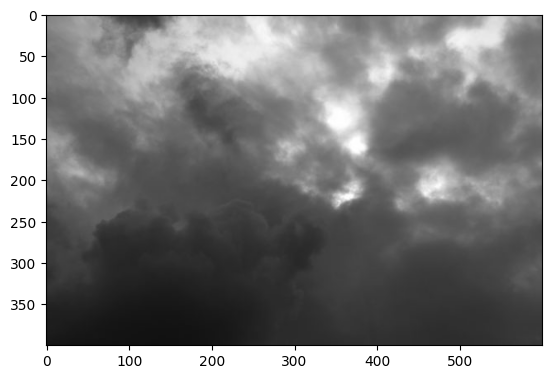

In [40]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('data/cloudy/cloudy1.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")

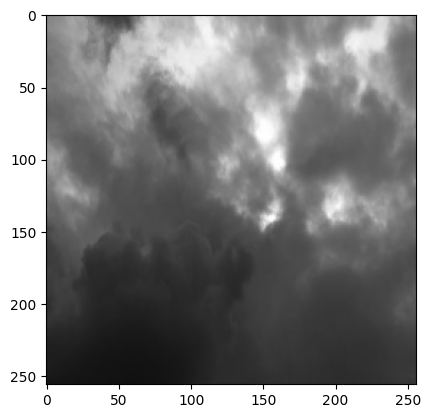

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 174ms/step


In [43]:
yhat

array([[9.9908364e-01, 2.3932779e-08, 3.5425232e-04, 1.1514611e-08,
        2.9536710e-07, 5.8179681e-05, 9.5117357e-05, 3.9669685e-04,
        5.4572896e-10, 1.1213181e-05, 5.8602780e-07, 3.9660094e-08]],
      dtype=float32)

In [44]:
img_path = 'denemeVeri/yagmur2.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")


In [45]:
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')


1/1 [==============================] - 0s 63ms/step
Predicted class indices: [3]
Predicted class: glaze
Probability for class cloudy: 1.0750497714262508e-12
Probability for class dew: 2.6311588953831233e-05
Probability for class fogsmog: 4.939607151754899e-06
Probability for class glaze: 0.7679520845413208
Probability for class hail: 0.046897295862436295
Probability for class lightning: 8.580019561586077e-14
Probability for class rain: 0.0005613224348053336
Probability for class rainbow: 3.883092577951913e-13
Probability for class rime: 0.16842469573020935
Probability for class shine: 3.0622591268292254e-11
Probability for class snow: 0.016133373603224754
Probability for class sunrise: 1.242911051857476e-10


# 11. Save the Model

In [37]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','model70basari.h5'))

In [51]:
new_model = load_model('D:\ImageClassification\models\model70basari.h5')

In [91]:
new_model.predict(np.expand_dims(resize/255, 0))


ValueError: in user code:

    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ImageClassification\imageclasskernel\lib\site-packages\keras\engine\input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 1, 256, 256, 3)


# 12. Confusion Matrix

In [51]:
# Confusion Matrix oluşturma ve çizme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Test veri seti üzerinde tahminlerin ve gerçek etiketlerin toplanması
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Sınıf indekslerini listeler içinde ekleyin
    y_true.append([np.argmax(label) for label in y])
    y_pred.append([np.argmax(pred) for pred in yhat])

# Listeleri numpy dizilerine çevirme
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion Matrix oluşturma
conf_mat = confusion_matrix(y_true, y_pred)

# Sınıf isimleri
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Pandas DataFrame'e dönüştürme
conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

# Confusion Matrix'i çizme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





1/1 [==============================] - 0s 359ms/step


# Realtime

In [46]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic # Holistic model

In [53]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import time

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
sequence_length = 1

# [10,1,224,224,3]-needed input shape
cap = cv2.VideoCapture(0)

# Süreyi beklemek için kullanılacak zaman aralığı (saniye cinsinden)
wait_interval = 0.1

# Önceki tahminin başlangıçta tanımlanması
previous_prediction = None

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Resize the frame to match the model's expected sizing
    resized_frame = cv2.resize(frame, (256, 256))

    # Preprocess the frame for the model
    input_data = preprocess_input(np.expand_dims(resized_frame, axis=0))

    # Update the sequence with the preprocessed frame
    sequence.append(input_data)

    # Eğer belirlenen saniye aralığına ulaşıldıysa işlem yap
    if len(sequence) == sequence_length:
        sequence = np.array(sequence)

        # Remove the singleton dimension
        sequence = np.squeeze(sequence, axis=1)

        # Doğrudan modeli çağırın ve tahmin alın
        res = model.predict(sequence)
        current_prediction = class_names[np.argmax(res)]

        # Eğer önceki tahminden farklıysa güncelle
        if current_prediction != previous_prediction:
            print(current_prediction)

        # Güncelleme yapıldıktan sonra ekrandaki etiketi güncelle
        sentence = [current_prediction]

        # Görsel olarak etiketi belirtmek için metni ayarla
        text = ' '.join(sentence)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (10, 30)
        font_scale = 1
        color = (0, 0, 255)  # Kırmızı renk (BGR formatında)
        thickness = 2
        frame = cv2.putText(frame, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', frame)

        # Bekleme süresi kadar uyku
        time.sleep(wait_interval)

        # Reset the sequence for the next predictions
        sequence = []

        # Güncelleme yapıldıktan sonra önceki tahmini güncelle
        previous_prediction = current_prediction

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 1s 586ms/step
snow
1/1 [==============================] - 0s 32ms/step
sunrise
1/1 [==============================] - 0s 33ms/step
dew
1/1 [==============================] - 0s 31ms/step
sunrise
1/1 [==============================] - 0s 27ms/step
dew
1/1 [==============================] - 0s 30ms/step
sunrise
1/1 [==============================] - 0s 34ms/step
dew
1/1 [==============================] - 0s 27ms/step
hail
1/1 [==============================] - 0s 125ms/step
dew
1/1 [==============================] - 0s 468ms/step
sunrise
1/1 [==============================] - 0s 31ms/step
dew
1/1 [==============================] - 0s 31ms/step
lightning
1/1 [==============================] - 0s 34ms/step
sunrise
1/1 [==============================] - 0s 59ms/step
hail
1/1 [==============================] - 0s 61ms/step
sunrise
1/1 [==============================] - 0s 54ms/step
fogsmog
1/1 [==============================] - 0s 64ms/step
sunrise
1/1 